In [73]:

# import packages

# computing/analysis
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [43]:
from oauth2client.client import GoogleCredentials

from google.colab import auth as google_auth
google_auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [44]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive

# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [45]:
# path = '/content/gdrive/MyDrive/OULAD_analysis/'
path = '/content/gdrive/MyDrive/OULAD_analysis/'

assessments = pd.read_csv(path + "assessments.csv")

courses = pd.read_csv(path + "courses.csv")

studentAssessment = pd.read_csv(path + "studentAssessment.csv")

studentInfo = pd.read_csv(path + "studentInfo.csv")

studentRegistration = pd.read_csv(path + "studentRegistration.csv")

studentVLE = pd.read_csv(path + "studentVle.csv")

vle = pd.read_csv(path + "vle.csv")

In [46]:
domains=pd.DataFrame(
    {
        "code_module": ["AAA", "BBB", "CCC", "DDD", "EEE", "FFF", "GGG"],
        "domain": [
            "Social Sciences",
            "Social Sciences",
            "STEM",
            "STEM",
            "STEM",
            "STEM",
            "Social Sciences",
        ],
    },
)

In [47]:
from shutil import rmtree
from tempfile import mkdtemp

import numpy as np
import pandas as pd
import plotly.express as px
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from IPython.display import display
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PowerTransformer



In [48]:
studentInfo=pd.read_csv("/content/gdrive/MyDrive/OULAD_analysis/studentInfo.csv")

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
assessment=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/assessments.csv")

In [51]:
courses=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/courses.csv")

In [52]:
studentAssessment=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentAssessment.csv")

In [62]:
studentRegistration=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentRegistration.csv")

In [61]:
studentVLE=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/studentVle.csv")

In [63]:
vle=pd.read_csv("/content/drive/MyDrive/OULAD_analysis/vle.csv")

In [64]:
courses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [57]:
# average number of days per module
courses.groupby(['code_module'])['module_presentation_length'].agg('mean')

code_module
AAA    268.500000
BBB    251.000000
CCC    255.000000
DDD    251.000000
EEE    259.333333
FFF    254.500000
GGG    257.000000
Name: module_presentation_length, dtype: float64

In [58]:
courses.describe()
# modules lasted between 234-269 days.

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [59]:
# Get an understanding of what we have in the studentInfo table.
studentInfo.info()

# We see that we have some missing data in the `imd_band` column, which we would need to take into account when we analyze `imd_band` later.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [60]:
studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [65]:
len(studentInfo['id_student'])

32593

In [66]:
len(studentInfo['id_student'].unique())
# Note that this table can have multiple student as it is arranged to represent one registration at a time

28785

In [68]:
studentInfo['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [69]:
# In our analysis we'll look at the outcome as a binary result - Pass or Fail.
pass_fail = {'Withdrawn': 'Fail', 'Distinction': 'Pass'}
studentInfo['final_result'] = studentInfo['final_result'].replace(pass_fail)

In [71]:
studentInfo['final_result'].unique()

array(['Pass', 'Fail'], dtype=object)

<ipython-input-74-271c4bbcbaac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  PF = sns.countplot(x=studentInfo['final_result'], palette={'Fail': '#EE9979', 'Pass': '#CBEE79'})


Text(0, 0.5, 'Number of Students')

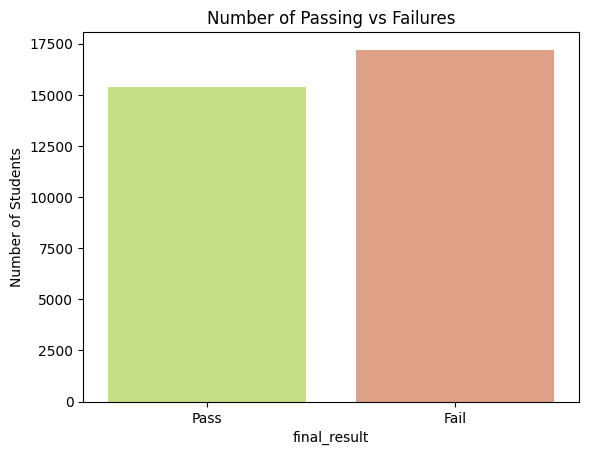

In [74]:
PF = sns.countplot(x=studentInfo['final_result'], palette={'Fail': '#EE9979', 'Pass': '#CBEE79'})
PF.set_title('Number of Passing vs Failures')
PF.set_ylabel('Number of Students')

In [75]:
location = studentInfo.groupby('region')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(df, group, count, title):
    '''
    df: the grouped dataframe that is getting plotted
    group: the categories we want to show
    count: the column that has count of the values per category
    title: title that goes on the bar chart
    '''

    labels = df[group].values
    data = df[count].values

    fig = plt.figure(figsize=(10, 7))
    sns.barplot(x=labels, y=data, palette='viridis')
    plt.xlabel(group)
    plt.ylabel(count)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-76-99af8fe28527>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette='viridis')


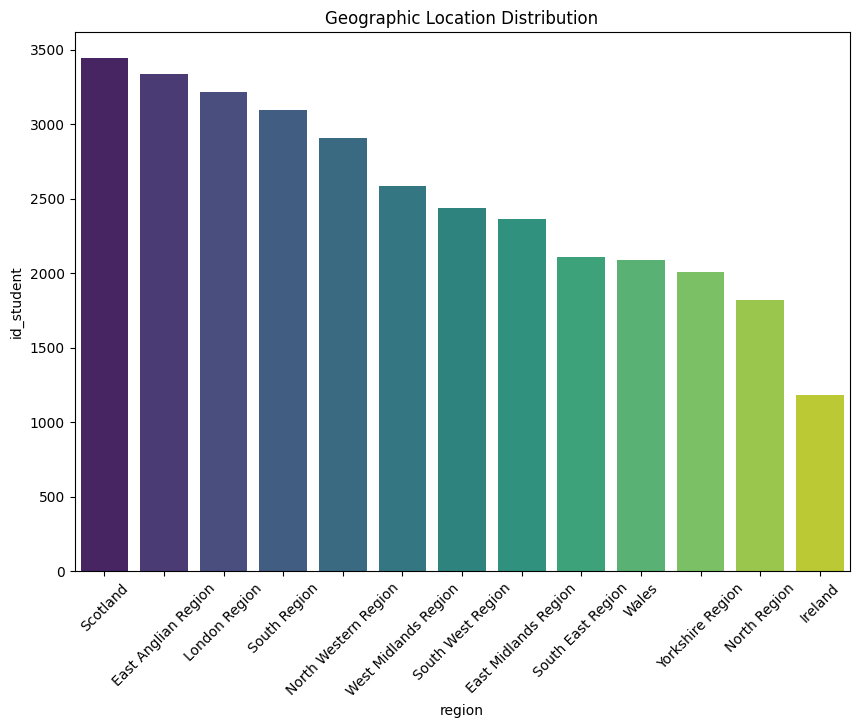

In [77]:
bar_chart(location, 'region', 'id_student', 'Geographic Location Distribution')

<ipython-input-76-99af8fe28527>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette='viridis')


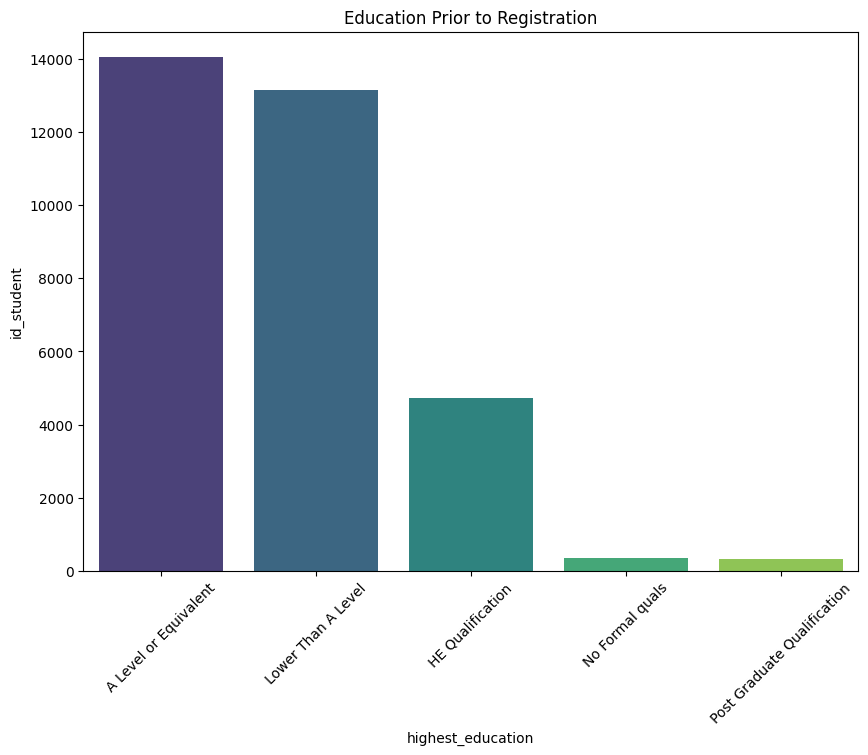

In [78]:
high_ed = studentInfo.groupby('highest_education')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)
bar_chart(high_ed, 'highest_education', 'id_student', 'Education Prior to Registration')

<ipython-input-76-99af8fe28527>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette='viridis')


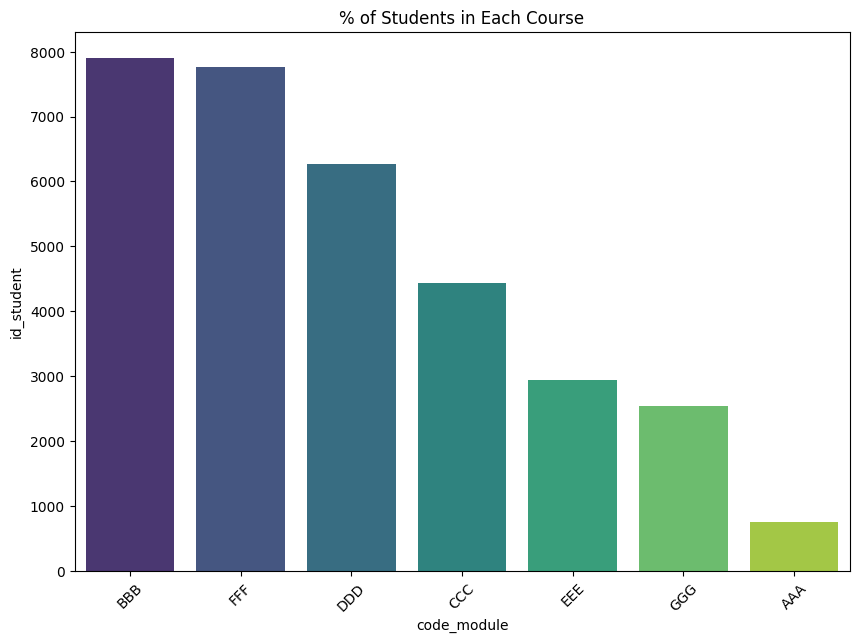

In [79]:
courses = studentInfo.groupby('code_module')['id_student'].count().reset_index().sort_values(by=['id_student'], ascending=False)
bar_chart(courses, 'code_module', 'id_student', '% of Students in Each Course')

# **Assessments** **Table**

In [80]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
